# Flyweight

The Flyweight design pattern is used to minimize memory usage or computational expenses by sharing as much data as possible with similar objects.

It is particularly useful when dealing with a large number of objects that have some shared intrinsic state.



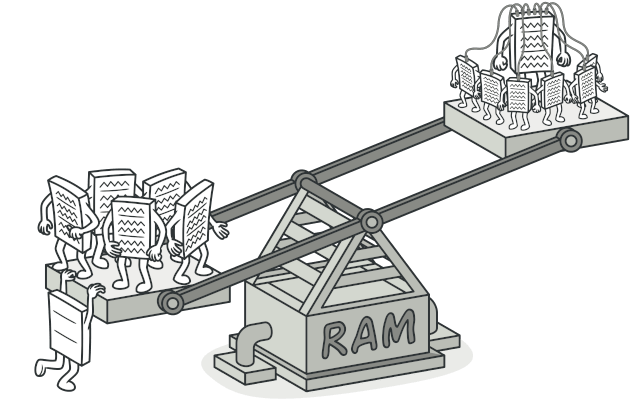

## Flyweight Class

First, let's define the Flyweight class that represents the shared state of the trees:

In [1]:
class TreeType:
    def __init__(self, name, color, texture):
        self.name = name
        self.color = color
        self.texture = texture

    def draw(self, x, y):
        print(f"Drawing a {self.name} tree of color {self.color} at ({x}, {y}) with texture {self.texture}")

## Flyweight Factory

Next, we'll create a Flyweight Factory to manage and reuse TreeType instances:

In [2]:
class TreeFactory:
    tree_types = {}

    @classmethod
    def get_tree_type(cls, name, color, texture):
        key = (name, color, texture)
        if key not in cls.tree_types:
            cls.tree_types[key] = TreeType(name, color, texture)
            print(f"Creating new tree type: {name}, {color}, {texture}")
        else:
            print(f"Reusing existing tree type: {name}, {color}, {texture}")
        return cls.tree_types[key]

## Context Class

We'll also define a context class that stores the extrinsic state (the unique part of each tree instance, like its position):

In [3]:
class Tree:
    def __init__(self, x, y, tree_type):
        self.x = x
        self.y = y
        self.tree_type = tree_type

    def draw(self):
        self.tree_type.draw(self.x, self.y)

## Using the Flyweight Pattern

Finally, let's see how we can use these classes to create and draw trees efficiently:

In [4]:
if __name__ == "__main__":
    # Create a forest and add trees
    forest = []

    # Add trees with shared types
    forest.append(Tree(1, 2, TreeFactory.get_tree_type("Oak", "Green", "Rough")))
    forest.append(Tree(3, 4, TreeFactory.get_tree_type("Pine", "Green", "Smooth")))
    forest.append(Tree(5, 6, TreeFactory.get_tree_type("Oak", "Green", "Rough")))  # Reuses the Oak type
    forest.append(Tree(7, 8, TreeFactory.get_tree_type("Pine", "Green", "Smooth"))) # Reuses the Pine type
    forest.append(Tree(9, 10, TreeFactory.get_tree_type("Maple", "Red", "Smooth")))

    # Draw all trees
    for tree in forest:
        tree.draw()

Creating new tree type: Oak, Green, Rough
Creating new tree type: Pine, Green, Smooth
Reusing existing tree type: Oak, Green, Rough
Reusing existing tree type: Pine, Green, Smooth
Creating new tree type: Maple, Red, Smooth
Drawing a Oak tree of color Green at (1, 2) with texture Rough
Drawing a Pine tree of color Green at (3, 4) with texture Smooth
Drawing a Oak tree of color Green at (5, 6) with texture Rough
Drawing a Pine tree of color Green at (7, 8) with texture Smooth
Drawing a Maple tree of color Red at (9, 10) with texture Smooth
